**Authors:** Kimberly Liu and Isaac Tabor

## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

## Part 1: Downloading our dataset

* Clone the repo below and adjust file path as necessary to import data

In [2]:
! git clone https://github.com/kimberlyyliuu/EDA/

Cloning into 'EDA'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 124 (delta 26), reused 24 (delta 24), pack-reused 92 (from 2)
Receiving objects: 100% (124/124), 11.55 MiB | 15.19 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [3]:
import pandas as pd

df = pd.read_excel('/content/EDA/lab/GSS.xlsx')
#df = pd.read_excel('GSS.xlsx')
df.head()

,year,id_,age,sex,race,income06,rincom06,gunlaw,abany,owngun,conrinc,ballot
0,2010,1,31,MALE,Other,$75000 TO $89999,$75000 TO $89999,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,66247.5,Ballot b
1,2010,2,23,FEMALE,White,$15000 TO 17499,$7 000 TO 7 999,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,6022.5,Ballot b
2,2010,3,71,FEMALE,Black,$20000 TO 22499,.i: Inapplicable,FAVOR,NO,NO,-100.0,Ballot a
3,2010,4,82,FEMALE,White,$8 000 TO 9 999,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,-100.0,Ballot b
4,2010,5,78,FEMALE,Black,.d: Do not Know/Cannot Choose,.i: Inapplicable,FAVOR,.n: No answer,NO,-100.0,Ballot c


## Part 2: Data Description and Background

**Data Description and Background**

> As mentioned above, the data we collected comes from the General Social Survey (GSS), a bi-annual nationally representative American  survey of Americans with an abundant of variables to choose from. In short, it is very good data on a lot of interesting topics. We chose to extract 12 variables to form a dataset of 11,771 entries.

> Our dataset primarily surrounds capturing attitudes on particular social issues, alongside demographic and economic factors that may influence these views. Specifically, we selected the gunlaw variable, which contains an OPPOSE or FAVOR response to the question, "Would you favor or oppose a law which would require a person to obtain a police permit before he or she could buy a gun?" Additionally, we chose the abany vaiable, which is a response to whether the respondent believes it should be possible for a pregnant woman to obtain a legal abortion if the woman wants it for any reason.

> To support and contextualize those primary variables of interest, we also collected the year variable, which corresponds to the  GSS year for the respondent, and the id_ variable, which is a respondent's unique identification number. Additionally, we gathered demographic and economic information on each respondent. To ensure a structured and reliable time series analysis, we specifically selected survey years at two-year intervals from 2010 to 2018 (2010, 2012, 2014, 2016, 2018). This approach was intentional in order to minimize the influence of external economic and societal shocks, such as the 2008 financial crisis and the COVID-19 pandemic, which significantly impacted public opinion and economic conditions in 2020 and beyond. By focusing on a relatively stable economic and social period, we aimed to provide a clearer and more consistent analysis of long-term trends.


> The demographic variables we collected are age, sex, race, and owngun (whether someone has a gun or revolver in their house or garage). The economic variables we gathered on each respondent are income06 and rincome06, which refer to total family and respondent income, respectively. This income data is available for years 2006, 2008, 2010, 2012, and 2014. Additionally, we gathered conrincome, which is inflation adjusted personal income.

> With this data collected, we felt confident in being able to form an analysis on public opinion on controversial topics, and gain a deeper perspective of American society on these issues.   



## Part 3: Data Cleaning with Explanation of Choices


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11771 entries, 0 to 11770
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      11771 non-null  int64  
 1   id_       11771 non-null  int64  
 2   age       11771 non-null  object 
 3   sex       11771 non-null  object 
 4   race      11771 non-null  object 
 5   income06  11771 non-null  object 
 6   rincom06  11771 non-null  object 
 7   gunlaw    11771 non-null  object 
 8   abany     11771 non-null  object 
 9   owngun    11771 non-null  object 
 10  conrinc   11771 non-null  float64
 11  ballot    11771 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.1+ MB




*   From this concise summary and the first five rows of the dataframe, we can immediately see that **age**, **income06**, and **rincome06** are not appropriately stored as numeric variables



**Cleaning age column**

In [5]:
df['age'].unique()


array(['31', '23', '71', '82', '78', '40', '46', '80', '.n:  No answer',
       '21', '58', '36', '57', '28', '84', '51', '35', '49', '56', '88',
       '26', '33', '53', '63', '34', '75', '43', '83', '69', '24', '25',
       '66', '20', '37', '64', '45', '60', '22', '72', '42', '54', '41',
       '19', '44', '50', '39', '48', '38', '55', '59', '68', '61', '65',
       '27', '32', '52', '47', '70', '30', '29', '67', '89 or older',
       '18', '76', '79', '73', '62', '77', '85', '81', '86', '74', '87'],
      dtype=object)



*   By analyzing unique values, we can see that values **'.n:  No answer',** and **'89 or older'** need to be cleaned

*   We decided that '.n: No answer' should be replaced with np.nan to be treated appropriately with data analysis

*   We decided that '89 or older' should be replaced with 89 to preserve the dataset's numeric integrity and to minimize assumptions because we felt it would be too speculative to assign 95, for example.







In [6]:
import numpy as np

# Cleaning age column

df['age'] = df['age'].replace({
    '.n:  No answer': np.nan,
    '89 or older': 89
})

df['age'] = pd.to_numeric(df['age'])

print(df['age'].unique())
print(df['age'].dtype)

[31. 23. 71. 82. 78. 40. 46. 80. nan 21. 58. 36. 57. 28. 84. 51. 35. 49.
 56. 88. 26. 33. 53. 63. 34. 75. 43. 83. 69. 24. 25. 66. 20. 37. 64. 45.
 60. 22. 72. 42. 54. 41. 19. 44. 50. 39. 48. 38. 55. 59. 68. 61. 65. 27.
 32. 52. 47. 70. 30. 29. 67. 89. 18. 76. 79. 73. 62. 77. 85. 81. 86. 74.
 87.]
float64


**Cleaning income columns**

In [7]:
df['income06'].unique()

array(['$75000 TO $89999', '$15000 TO 17499', '$20000 TO 22499',
       '$8 000 TO 9 999', '.d:  Do not Know/Cannot Choose',
       '$10000 TO 12499', '.r:  Refused', '$50000 TO 59999',
       '$40000 TO 49999', '$90000 TO $109999', '$22500 TO 24999',
       '$4 000 TO 4 999', '$12500 TO 14999', '$60000 TO 74999',
       '$3 000 TO 3 999', '$150000 OR OVER', '$5 000 TO 5 999',
       '$130000 TO $149999', '$17500 TO 19999', '$25000 TO 29999',
       '$110000 TO $129999', '$30000 TO 34999', 'UNDER $1 000',
       '$35000 TO 39999', '$1 000 TO 2 999', '$7 000 TO 7 999',
       '$6 000 TO 6 999', '.i:  Inapplicable'], dtype=object)

In [8]:
df['year'].unique()

array([2010, 2012, 2014, 2016, 2018])



*   Noting here that in gss documentation, it has income06 and rincome06 had data available for years 2006, 2008, 2010, 2012, and 2014, and our data ranges for 2010-2018



* We could clean this or we could just use **conrincome** since that is inflation-adjusted and a clean numeric value.

In [9]:
df['conrinc'].describe()

,conrinc
count,11771.000000
mean,20298.998512
std,34123.643742
min,-100.000000
25%,-100.000000
50%,6309.000000
75%,30112.500000
max,324512.292140


In [10]:
(df['conrinc'] == -100).sum() / len(df)

0.41670206439554835

In [11]:
sum(df['conrinc'].isna())

0

*   It appears that for **conrinc**, which covers inflation-adjusted personal income, -100 is being used to report unknown income and that accounts for 41.67% of our conrinc data.
*   It is possible this could include stay at home parents, younger populations, etc.




In [12]:
year_counts = df[df['conrinc'] == -100].groupby('year').size()
year_proportions = year_counts / year_counts.sum() # this is taking how many -100 there are in each year and dividing by total -100 in dataset.
year_proportions

,0
year,
2010,0.171662
2012,0.168807
2014,0.206932
2016,0.251784
2018,0.200815




*   The missing data is not disproprotinately associated with one year.







In [13]:
sex_counts = df[df['conrinc'] == -100].groupby('sex').size()
sex_proportions = sex_counts / sex_counts.sum() # this is taking how many -100 there are in each sex and dividing by total -100 in dataset.
sex_proportions

,0
sex,
FEMALE,0.607136
MALE,0.392864




*   According to the Pew Research Center, [dads make up 18% of stay at home parents](https://www.pewresearch.org/short-reads/2023/08/03/almost-1-in-5-stay-at-home-parents-in-the-us-are-dads/#:~:text=The%20share%20who%20are%20stay,mothers%20and%207%25%20of%20fathers.), so it is possible many of the -100 are stay-at home parents given there are significantly more stay-at home moms and more female -100 values for inflation-adjusted personal income.


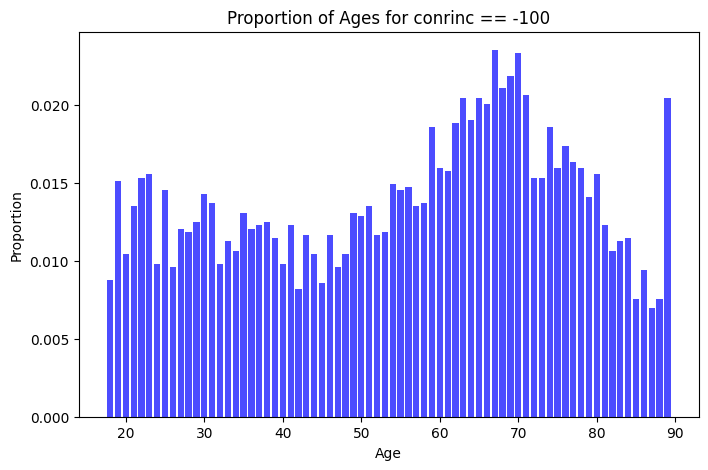

In [14]:
import matplotlib.pyplot as plt

# Filter data and group by age
filtered_df = df[df['conrinc'] == -100]
age_counts = filtered_df.groupby('age').size()

# Convert to proportions
age_proportions = age_counts / age_counts.sum() # this is taking how many -100 there are in each age and dividing by total -100 in dataset.

# Plot histogram
plt.figure(figsize=(8, 5))
plt.bar(age_proportions.index, age_proportions.values, color='blue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title('Proportion of Ages for conrinc == -100')
plt.show()

*   There is not a higher concentration of -100 values for younger populations. It is slightly higher for ages 60-70 though.

For now, we will replace these values with np.nan to treat these values appropriately in data analysis.


In [15]:
df['conrinc'] = df['conrinc'].replace(-100, np.nan)

**Checking Other Columns**

In [16]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [17]:
df['race'].unique()

array(['Other', 'White', 'Black'], dtype=object)


*   This is important to note in our analysis



In [18]:
df['gunlaw'].unique()

array(['.i:  Inapplicable', 'FAVOR', 'OPPOSE',
       '.d:  Do not Know/Cannot Choose', '.n:  No answer'], dtype=object)

In [19]:
df['abany'].unique()

array(['.i:  Inapplicable', 'NO', '.n:  No answer', 'YES',
       '.d:  Do not Know/Cannot Choose'], dtype=object)

In [20]:
df['owngun'].unique()

array(['.i:  Inapplicable', 'NO', 'YES', 'REFUSED',
       '.d:  Do not Know/Cannot Choose'], dtype=object)

In [21]:
df['ballot'].unique()

array(['Ballot b', 'Ballot a', 'Ballot c'], dtype=object)


*   We could merge '.i:  Inapplicable', '.d:  Do not Know/Cannot Choose', '.n:  No answer', and/or 'REFUSED', but they are each a little different I suppose, so I am not sure it is necessary. I feel it could go either way

*   We could also replace those categories with np.nans.

*   Ultimately, I think it depends on whether we feel the distinction is important for our analysis and/or the best representation of public opinion, which I think the distinction may be worthwhile, especially for those who "Do not know / Cannot Choose."




In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11771 entries, 0 to 11770
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      11771 non-null  int64  
 1   id_       11771 non-null  int64  
 2   age       11737 non-null  float64
 3   sex       11771 non-null  object 
 4   race      11771 non-null  object 
 5   income06  11771 non-null  object 
 6   rincom06  11771 non-null  object 
 7   gunlaw    11771 non-null  object 
 8   abany     11771 non-null  object 
 9   owngun    11771 non-null  object 
 10  conrinc   6866 non-null   float64
 11  ballot    11771 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.1+ MB




*   Cleaned concise summary of our dataset.



## Part 4: Numeric Summaries and Visualizations

**Research Question 1: How does gun ownership correlate with views on gun laws?**

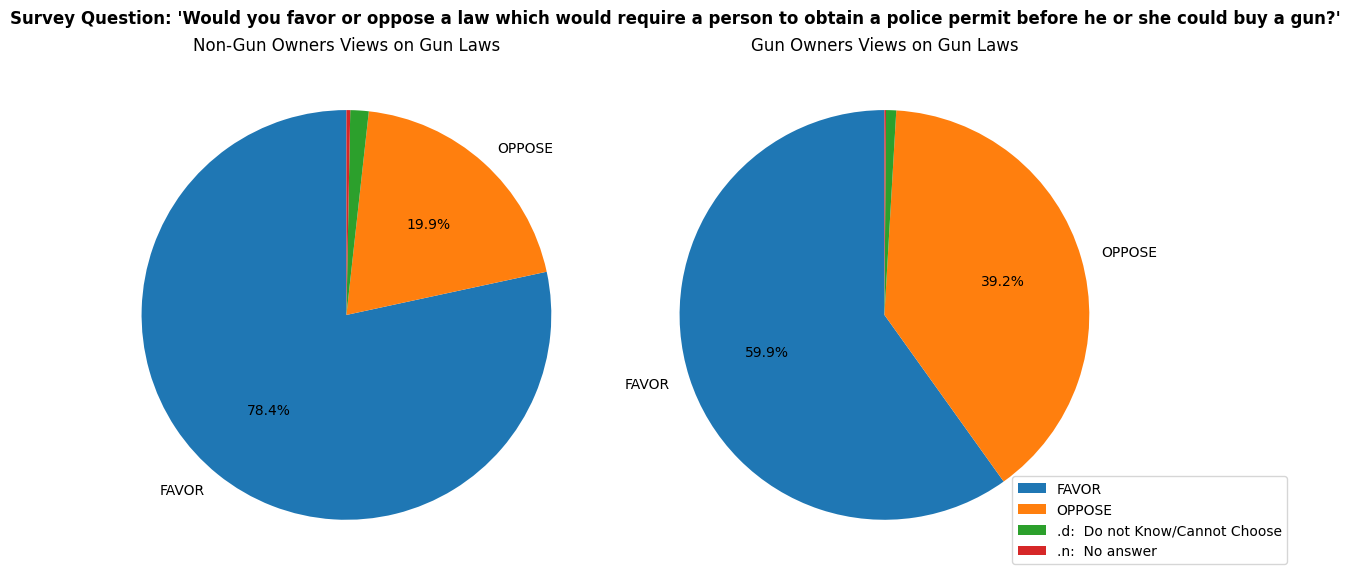

In [23]:
# Function to filter labels based on percentage
def filter_labels(values, labels):
    total = sum(values)
    filtered_labels = [label if (value / total * 100) > 2 else '' for label, value in zip(labels, values)]
    return filtered_labels

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for people who do not own guns
no_own_gun = df[df['owngun'] == 'NO']
no_own_gun_gunlaw = no_own_gun['gunlaw'].value_counts()
filtered_labels = filter_labels(no_own_gun_gunlaw.values, no_own_gun_gunlaw.index)
axes[0].pie(no_own_gun_gunlaw, labels=filtered_labels, autopct=lambda p: f'{p:.1f}%' if p > 2 else '', startangle=90)
axes[0].set_title('Non-Gun Owners Views on Gun Laws')

# Plot for people who own guns
own_gun = df[df['owngun'] == 'YES']
own_gun_gunlaw = own_gun['gunlaw'].value_counts()
filtered_labels = filter_labels(own_gun_gunlaw.values, own_gun_gunlaw.index)
axes[1].pie(own_gun_gunlaw, labels=filtered_labels, autopct=lambda p: f'{p:.1f}%' if p > 2 else '', startangle=90)
axes[1].set_title('Gun Owners Views on Gun Laws')

plt.suptitle("Survey Question: 'Would you favor or oppose a law which would require a person to obtain a police permit before he or she could buy a gun?'",
             fontsize=12, fontweight="bold")

# Show the plot
plt.legend(labels = own_gun_gunlaw.index, loc = "lower right",bbox_to_anchor = (1.3,0))
plt.tight_layout()
plt.show()




*   For those who own a gun, 59.9% responded in favor of gun laws which would require a person to obtain a police permit before he or she could buy a gun, while for those who do not own a gun, 78.4% favor gun laws that would require a police permit.
*   19.9% of those who do not own a gun oppose gun laws that would require a police permit to buy a gun, which is much less than the 39.2% of gun-owners who oppose such a law.
*   While it seems like less gun-owners favor a law requiring a police permit to own a gun, I do think it is interesting to note that still a majority of gun-owner respondents favor such a gun law, and it could be interesting to see how many states do require such a permit.
*   Cool future exploration would be to conduct statistical test to see if difference is statistically significant







**RQ2: Do opinions on abortion differ by gender and/or age?**

<ipython-input-24-80ff12b18a7d>:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


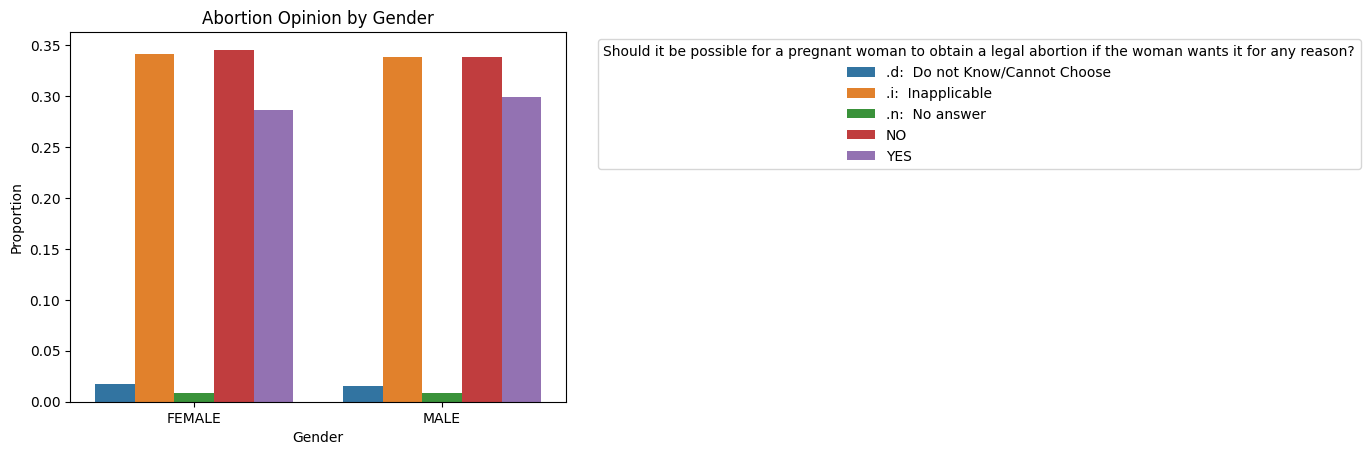

<ipython-input-24-80ff12b18a7d>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = df.groupby('age_group')['abany'].value_counts(normalize=True).unstack()
<ipython-input-24-80ff12b18a7d>:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


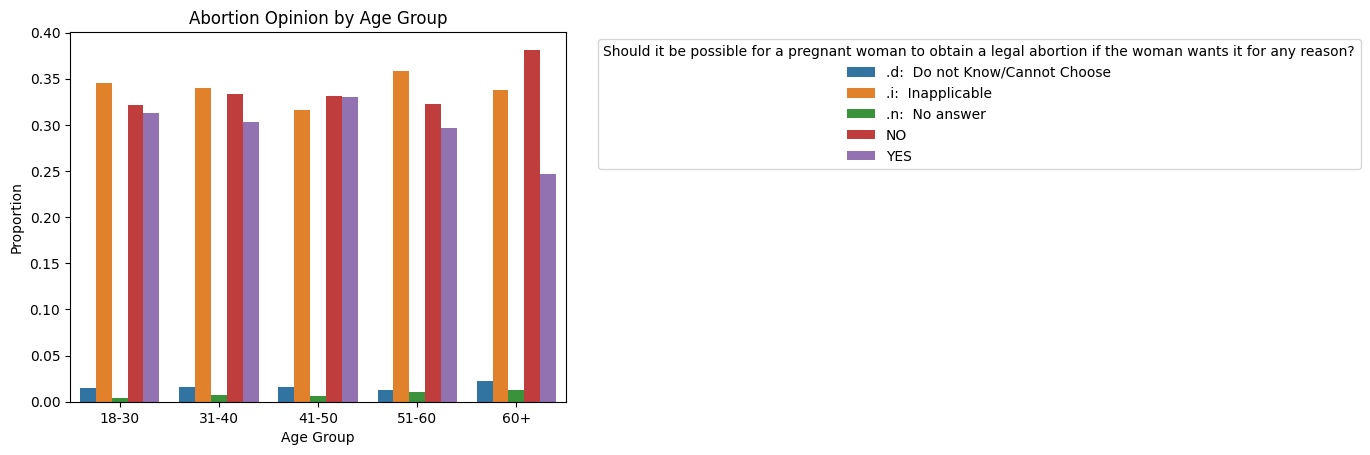

In [24]:
import seaborn as sns # Note: Used ChatGPT to help compare proportion of gender instead of count

# Compute proportions by gender
gender_counts = df.groupby('sex')['abany'].value_counts(normalize=True).unstack()
gender_counts = gender_counts.reset_index().melt(id_vars='sex', var_name='abany', value_name='proportion')

# Compare abortion opinions by gender
sns.barplot(data=gender_counts, x='sex', y='proportion', hue='abany')
plt.title('Abortion Opinion by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title='Should it be possible for a pregnant woman to obtain a legal abortion if the woman wants it for any reason?', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Compute proportions by age group
age_counts = df.groupby('age_group')['abany'].value_counts(normalize=True).unstack()
age_counts = age_counts.reset_index().melt(id_vars='age_group', var_name='abany', value_name='proportion')

# Compare abortion opinions by age group
sns.barplot(data=age_counts, x='age_group', y='proportion', hue='abany')
plt.title('Abortion Opinion by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Should it be possible for a pregnant woman to obtain a legal abortion if the woman wants it for any reason?', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


* Interesting to add proportion of gender from the observations rather than count
* Curious how we can go about not using count because i think count can be misleading.  

*   It could be interesting to see if it differs by income level too if we clean that more
*   It is interesting how many people responded with inapplicable.
*   Seems like most people are saying no.
*   This is across all years.
*   Could make this prettier

*   This shows that 60+ group is most anti-abortion












In [25]:
age_counts = df['age'].value_counts().sort_values()
print(age_counts)

age
87.0     36
88.0     38
85.0     40
86.0     52
82.0     54
       ... 
55.0    227
56.0    227
37.0    234
53.0    237
30.0    248
Name: count, Length: 72, dtype: int64


In [26]:
age_group_counts = df['age_group'].value_counts().sort_index()
print(age_group_counts)

age_group
18-30    2164
31-40    2148
41-50    1965
51-60    2204
60+      3199
Name: count, dtype: int64


**RQ3: How has abortion opinion changed overtime?**

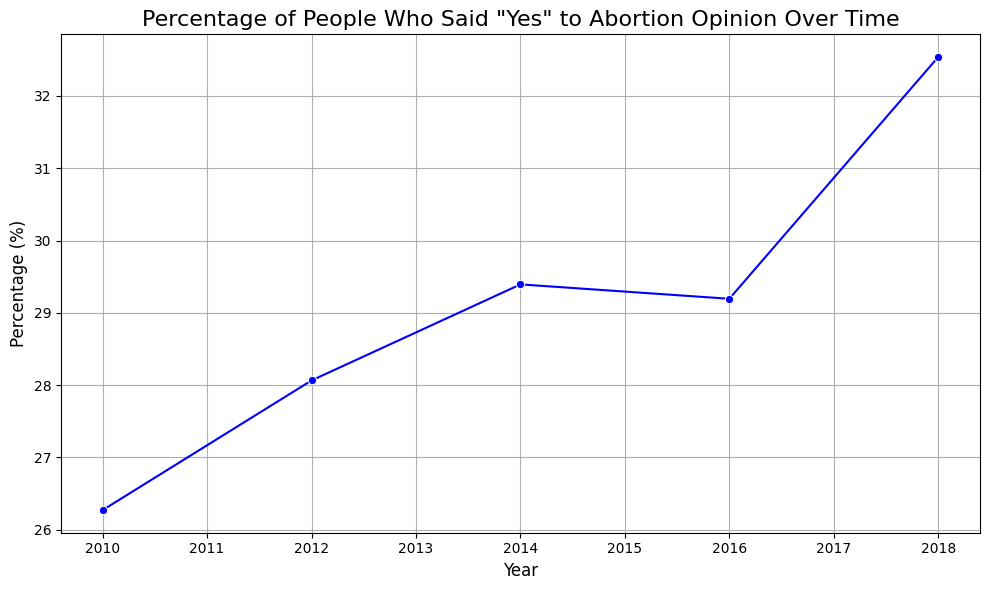

In [27]:
import seaborn as sns

# Calculate percentage of "Yes" responses to 'abany' by year
df_abany = df.groupby('year')['abany'].value_counts(normalize=True).unstack().fillna(0)
df_abany['pct_yes'] = df_abany['YES'] * 100  # Convert proportion to percentage

# Create the lineplot for pct_yes over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_abany, x=df_abany.index, y='pct_yes', marker='o', color='b')

# Title and labels
plt.title('Percentage of People Who Said "Yes" to Abortion Opinion Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()




*   This is very interesting
*   Should probably include the exact question in the graph
*   This also includes inapplicable answer so important to also show that 30% in favor for example, does not necessarily mean 70% opposed.





**RQ4: How do views on abortion differ by attitudes on gun laws?**

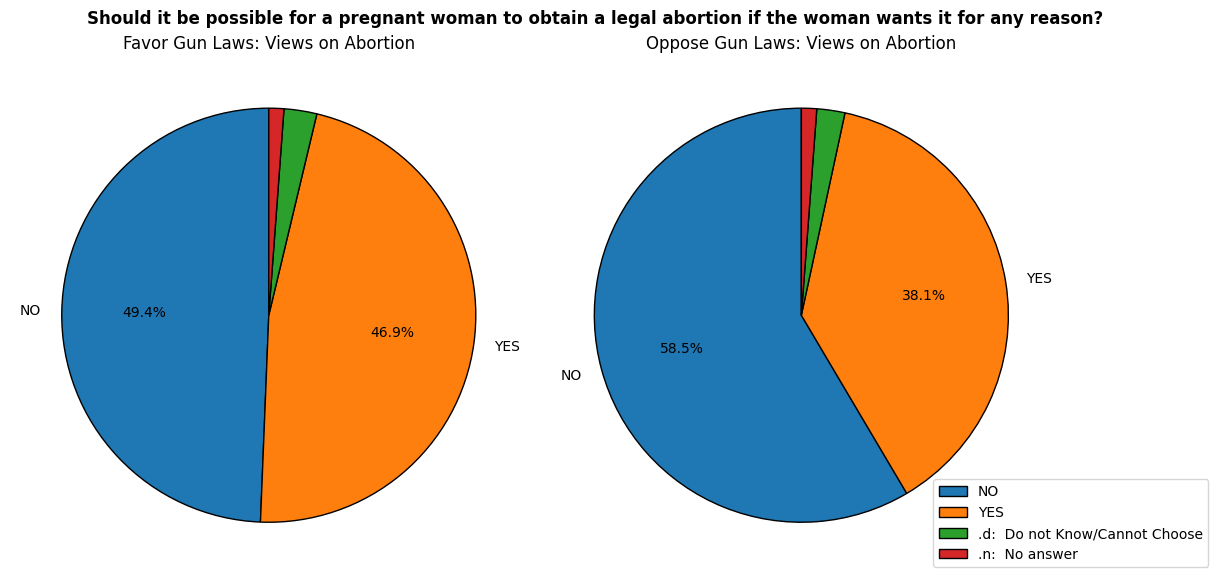

In [38]:
import matplotlib.pyplot as plt

# Function to filter labels based on percentage
def filter_labels(values, labels):
    total = sum(values)
    return [label if (value / total * 100) > 3 else '' for label, value in zip(labels, values)]

# Filter data for people who favor gun laws
favor_gun = df[df['gunlaw'] == 'FAVOR']  # Replace 'FAVOR' with the actual label for those who favor gun laws
# Filter data for people who oppose gun laws
oppose_gun = df[df['gunlaw'] == 'OPPOSE']  # Replace 'OPPOSE' with the actual label for those who oppose gun laws

# Count abortion opinions for those who favor and oppose gun laws
abany_favor_gun = favor_gun['abany'].value_counts()
abany_oppose_gun = oppose_gun['abany'].value_counts()

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for people who favor gun laws
filtered_labels_favor = filter_labels(abany_favor_gun.values, abany_favor_gun.index)

axes[0].pie(abany_favor_gun, labels=filtered_labels_favor, autopct=lambda p: f'{p:.1f}%' if p > 3 else '', startangle=90,
            wedgeprops={'edgecolor': 'black'})
axes[0].set_title('Favor Gun Laws: Views on Abortion')

# Pie chart for people who oppose gun laws
filtered_labels_oppose = filter_labels(abany_oppose_gun.values, abany_oppose_gun.index)

axes[1].pie(abany_oppose_gun, labels=filtered_labels_oppose, autopct=lambda p: f'{p:.1f}%' if p > 3 else '', startangle=90,
            wedgeprops={'edgecolor': 'black'})
axes[1].set_title('Oppose Gun Laws: Views on Abortion')

# Adjust layout to prevent overlap
# plt.legend(labels = own_gun_gunlaw.index, loc = "lower right",bbox_to_anchor = (1.3,0))

plt.suptitle("Should it be possible for a pregnant woman to obtain a legal abortion if the woman wants it for any reason?",  fontsize=12, fontweight="bold")
plt.legend(labels = abany_favor_gun.index, loc = "lower right",bbox_to_anchor = (1.3,0))
plt.tight_layout()
plt.show()




*   I find this particularly interesting because favoring gun laws is favoring more government intervention, but favoring pro-choice is less government intervention. Also, opposing gun laws is favoring less government intervention, but those who oppose gun laws are more against abortion (more government intervention)



In [28]:
'''Add visualization abt income and relationship of income and views on gun laws and abortion'''

'Add visualization abt income and relationship of income and views on gun laws and abortion'

In [29]:
''' Add visualization on how gun laws have changed over time'''

' Add visualization on how gun laws have changed over time'

## Part 5: Describe Findings

#### Gun Ownership
The analysis of gun ownership in relation to support for stricter gun laws reveals a clear correlation. Among gun owners, 59.9% favor requiring a police permit to purchase a firearm, while 39.2% oppose such a law. In contrast, among non-gun owners, 78.4% favor stricter gun laws, whereas only 19.9% oppose them.

While it is expected that those who own guns are less likely to support gun control measures compared to non-gun owners, it is notable that a majority (nearly 60%) of gun owners still favor such a law. This suggests that while gun ownership influences attitudes toward regulation, it does not necessarily indicate blanket opposition to firearm restrictions. This finding raises further questions about how gun laws are perceived across different political and regional backgrounds, and it would be interesting to compare this data against actual state-level gun permit requirements.

#### Abortion by Gender and Age

When analyzing abortion opinions based on gender, we observe that responses differ between men and women. COME BACK TO THIS

Breaking down abortion opinions by age, we observe an interesting generational trend. Younger respondents (aged 18-30) tend to be more supportive of unrestricted abortion access, while opposition appears to increase with age. The 60+ age group has the highest proportion of individuals opposing abortion rights, suggesting a generational shift in societal views. This trend may reflect broader cultural changes, political shifts, or the influence of historical events that shaped different age groups' perspectives on reproductive rights.
